# k-Means Clustering

Do $k$-Means Clustering using a different distance metric.



In [1]:
!wget -nc https://course.ccs.neu.edu/cs6220/fall2023/homework-4/data/f150_motor_distributors.txt

import numpy as np
import matplotlib.pyplot as plt

all_data = np.loadtxt("f150_motor_distributors.txt", delimiter=",")

--2023-10-17 20:13:32--  https://course.ccs.neu.edu/cs6220/fall2023/homework-4/data/f150_motor_distributors.txt
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255541 (250K) [text/plain]
Saving to: ‘f150_motor_distributors.txt’

f150_motor_distribu 100%[===================>] 249.55K  1.31MB/s    in 0.2s    

2023-10-17 20:13:33 (1.31 MB/s) - ‘f150_motor_distributors.txt’ saved [255541/255541]



2.	Implement a simple k-means algorithm in Python on Colab with the following initialization. You need only 100 iterations, maximum, and your algorithm should run very quickly to get the results.
3.	Scatter the results in two dimensions with different clusters as different colors.

In [2]:
from numpy.lib.arraysetops import unique
np.random.seed(seed=27)
def mahalanobisDistance(x, y, IP):
  diff = x - y
  return diff.T.dot(IP).dot(diff)

def kmeans_cluster(data,
                   centroids = np.random.randn(2,5),
                   P = np.eye(2),
                   num_iterations = 100):
  centroids = data.T[:, :5].T
  classes = np.random.choice(5, len(data))
  # <YOUR-CODE-HERE>
  if np.array_equal(P,np.eye(2)):
    for _ in range(num_iterations):
      # Calculate distance from each point to each centroid, then assign each point to the nearest centroid
      distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
      classes = np.argmin(distances, axis=1)
      # Update centroids with points in newly assigned classes
      newCentroids = np.array([data[classes == i].mean(axis=0) for i in range(5)])
      # If all centroids don't move from previous centroids, that means we're done with finding k-means
      if np.allclose(centroids, newCentroids):
        break
      centroids = newCentroids
    print(centroids)
    print(classes)
  else:
    inversePProduct = np.linalg.inv(np.dot(P.T, P))
    for _ in range(num_iterations):
      # Calculate distance from each point to each centroid, then assign each point to the nearest centroid
      distances = np.array([[mahalanobisDistance(point, centroid, inversePProduct) for centroid in centroids] for point in data])
      classes = np.argmin(distances, axis=1)
      # Update centroids with points in newly assigned classes
      newCentroids = np.array([data[classes == i].mean(axis=0) for i in range(5)])
      # If all centroids don't move from previous centroids, that means we're done with finding k-means
      if np.allclose(centroids, newCentroids):
        break
      centroids = newCentroids
    print(centroids)
    print(classes)
  return centroids, classes

def plot_data(data, centroids, classes):
  # <YOUR-CODE-HERE>
  uniqueClasses = np.unique(classes)
  colors = ['r', 'g', 'b', 'y', 'c']
  for num in uniqueClasses:
    clusterPoints = data[classes == num]
    plt.scatter(clusterPoints[:, 0], clusterPoints[:, 1], color=colors[num], s=10, label=f'Cluster {num + 1}')
  # Scatter centroids on the graph as black 'x'
  plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', label="centroids")
  plt.legend()
  plt.title('K Means Result')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()
  return

[[ 10.28915724  -1.75417494]
 [-33.16389126   2.64171963]
 [ -2.87105702  -2.25294435]
 [ 26.6302707   -1.07663852]
 [-16.37778287  -0.09633464]]
[4 1 4 ... 0 1 1]


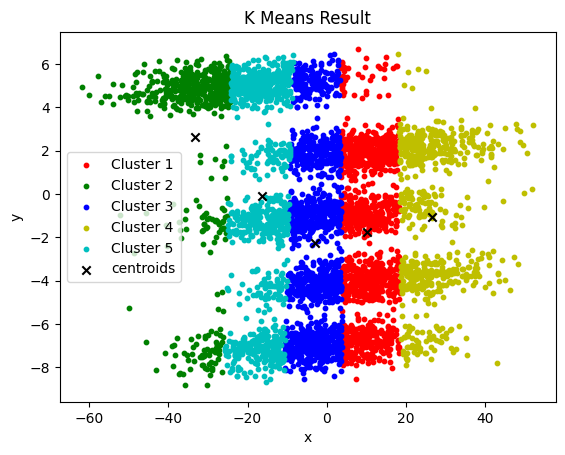

In [3]:
use_P = False #@param
centroids_ = np.array([[10.0, 10.0], [-10.0, -10.0], [2.0, 2.0], [3.0, 3.0], [-3.0, -3.0]])

if not use_P:
  P_ = np.eye(2)
else:
  P_ = np.array([[10, 0.5], [-10, 0.25]])


centroids_, classes_ = kmeans_cluster( all_data, centroids_, P = P_ )
plot_data(all_data, centroids_, classes_)


	5. Implement a specialized k-means with the above Mahalanobis Distance. Scatter the results with the different clusters as different colors. What do you notice? You may want to pre- compute P^(-1) so that you aren’t calculating an inverse every single loop of the k-Means algorithm.

[[ -3.24764066  -7.01766444]
 [  8.71408722  -4.00981947]
 [ -1.09670369  -0.9992032 ]
 [  9.97451285   2.00207148]
 [-20.40310599   5.00655283]]
[0 0 2 ... 2 4 2]


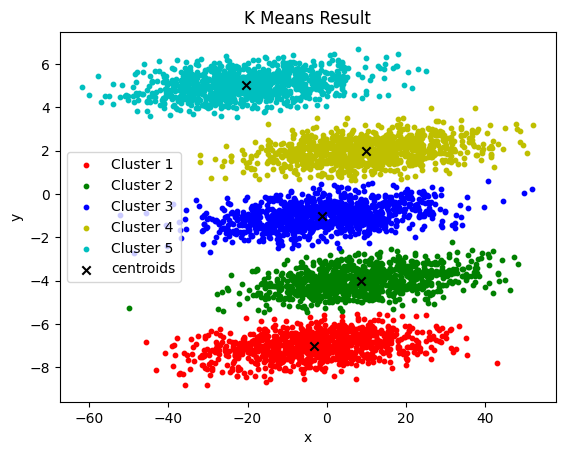

In [4]:
use_P = True #@param
centroids_ = np.array([[10.0, 10.0], [-10.0, -10.0], [2.0, 2.0], [3.0, 3.0], [-3.0, -3.0]])

if not use_P:
  P_ = np.eye(2)
else:
  P_ = np.array([[10, 0.5], [-10, 0.25]])


centroids_, classes_ = kmeans_cluster( all_data, centroids_, P = P_ )
plot_data(all_data, centroids_, classes_)

6.	Calculate and print out the first principle component of the aggregate data.

In [15]:
def calculateFirstPrincipleComponent(data):
  # Compute Covariance Matrix
  covarianceMatrix = np.cov(data, rowvar=False)
  # Compute Eigenvectors and Eigenvalues
  eigenvalues, eigenvectors = np.linalg.eig(covarianceMatrix)
  # Sort eigenvectors based on the value of eigenvalues, ascending
  sortedIndex = np.argsort(eigenvalues)
  sortedEigenvectors = eigenvectors[sortedIndex]
  # Assigned the largest element in the sorted eigenvectors as the first principle component
  result = sortedEigenvectors[:, -1]
  return result
firstPrincipleComponent = calculateFirstPrincipleComponent(all_data)
print("First Principle Component of the aggregate data: ", firstPrincipleComponent)

First Principle Component of the aggregate data:  [0.99838317 0.05684225]


7.	Calculate and print out the first principle components of each cluster. Are they the same as the aggregate data? Are they the same as each other?

In [16]:
clustersData = [all_data[classes_ == i] for i in range(5)]
clustersPrincipleComponent = [calculateFirstPrincipleComponent(cluster) for cluster in clustersData]
for i in range(len(clustersPrincipleComponent)):
  print("The first principle component of", i + 1, "Cluster:", clustersPrincipleComponent[i])

The first principle component of 1 Cluster: [ 0.99992533 -0.01222027]
The first principle component of 2 Cluster: [ 0.99989374 -0.01457781]
The first principle component of 3 Cluster: [ 0.99990986 -0.01342629]
The first principle component of 4 Cluster: [ 0.99993306 -0.01157047]
The first principle component of 5 Cluster: [ 0.99993527 -0.01137789]
